# **Loading Dataset and Importing Libraries**

In [1]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.util import mark_negation
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [26]:
import nltk
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
path = '/content/small_corpora.csv'
reviews = pd.read_csv(path)

In [29]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,False,"03 27, 2015",A35T1X6MXUJ0VO,B00KME8K9C,Josean Rodriguez,This is the worst battlefield yet I think first person shooter is getting old they nee reconfigure the completely it needs mayor overhaul maps but specially the game play some time s you be running around disoriented not knowing what to do too much running around looking for people bad save your money!,This is the worst battlefield yet I think first person shooter is getting ...,1427414400,NaN,{'Format:': ' Video Game'},NaN
1,1.0,True,"02 5, 2015",A2WCWURD1MU5Y,B002BH3N2W,Samantha,I gave this as a gift for Christmas and it was returned to me because it never worked. Disk was scratched upon receipt and seller refuses to replace. BUYER BEWARE!!!!!,BUYER BEWARE,1423094400,NaN,{'Format:': ' Video Game'},NaN
2,1.0,False,"10 26, 2004",A29VM84ZDEMCDN,B00006910J,Radem44,"Can't get this program to work with Windows XP at all. Screen goes black and locks up the computer. Atari does not offer any kind of patch to fix their program, but suggests you open Windows Task Manager and start shutting down all the background program on your computer to eliminate conflicts. Sorry, but I'm not shutting down my anti-virus, anti-spyware and firewall programs to play a stupid video game!",Worthless--Do not buy if you have Win XP,1098748800,11.0,NaN,NaN
3,1.0,True,"09 23, 2017",A3B4QQTV3RF77A,B017AGIDV4,John Lesnar,One star is because the product arrived without the disk and manual..,No disk.,1506124800,2.0,{'Format:': ' Video Game'},['https://images-na.ssl-images-amazon.com/images/I/81yaL92C9lL._SY88.jpg']
4,1.0,True,"06 1, 2017",A1XNZZ3UJO07LE,B00NQHO7SK,retro_r,"I used to love this headset, but the mic no longer works. The light is on for the mic (and can be turned off/on with the switch), but no audio is recorded. I tried contacting Sentey but they are ignoring me. What can I do?!\n\n(update 6/19/17 - dropping to 1 star out of 5. Reason is not the mic issue but that Sentey is completely ignoring my questions on their website or via email. Extremely poor customer service)",mic died :(,1496275200,NaN,{'Color:': ' BLack'},NaN


In [30]:
reviews.dropna(subset=['reviewText'], inplace=True)
reviews.shape

(4499, 12)

# **Sentiment Scoring Using SentiWordNet**

In [31]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [32]:
def get_sentiment_score(text):

    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += swn_synset.pos_score() - swn_synset.neg_score()

        total_score = total_score + (sent_score / len(tokens))


    return (total_score / len(raw_sentences)) * 100

In [33]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3352,A+,0.000000
1666,"Instead of Horizon, this should have been called, ""Forza: The Poor Attempt to Be Need For Speed.""\n\nGood things: Only one. The scenery is beautiful. But it's not enough. It never really changes enough, and after five minutes you feel like you've seen just about all there is to see.\n\nBad things: No rear view mirror (what? really?). Limited choices on how to set up your controller. I like the gas/brake on the right joystick - not an option here. Annoying woman talking to you throughout the game, asking you why you're not racing, commenting on your driving, telling you what you should do. Plays just like Need for Speed except there aren't any cops - one of the most fun things in NFS.\n\nBottom line: don't make the mistake I did and buy this thinking to extend your Forza experience. This is a whole different game.",-0.294118


# **Analytics, Accuracy and Visualizations**

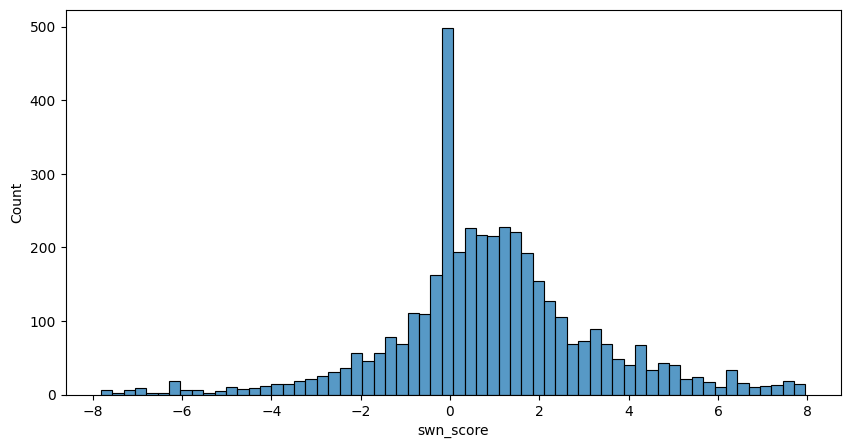

In [37]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.histplot(x='swn_score', data=reviews.query("swn_score < 8 and swn_score > -8"), ax=ax)
plt.show()

In [38]:
reviews['swn_sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>1 else ("negative" if x<0.5 else "neutral"))

In [39]:
reviews['swn_sentiment'].value_counts(dropna=False)

positive    2192
negative    1874
neutral      433
Name: swn_sentiment, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

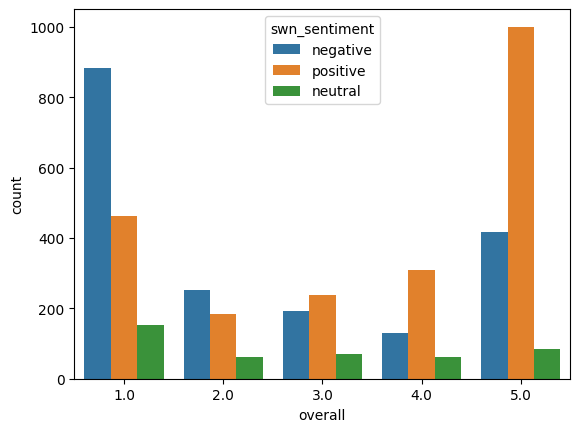

In [40]:
sns.countplot(x='overall', hue='swn_sentiment' ,data = reviews)

<Axes: xlabel='swn_sentiment', ylabel='overall'>

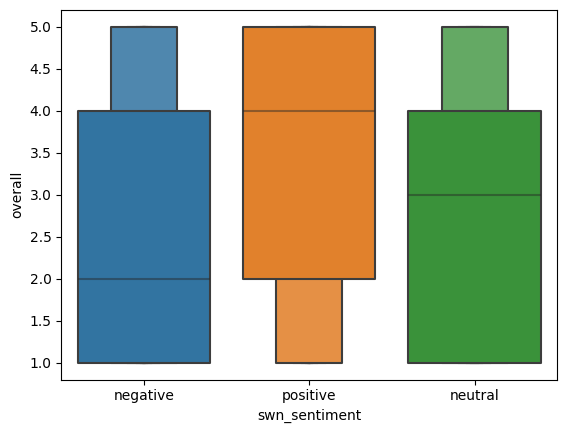

In [41]:
sns.boxenplot(x='swn_sentiment', y='overall', data = reviews)

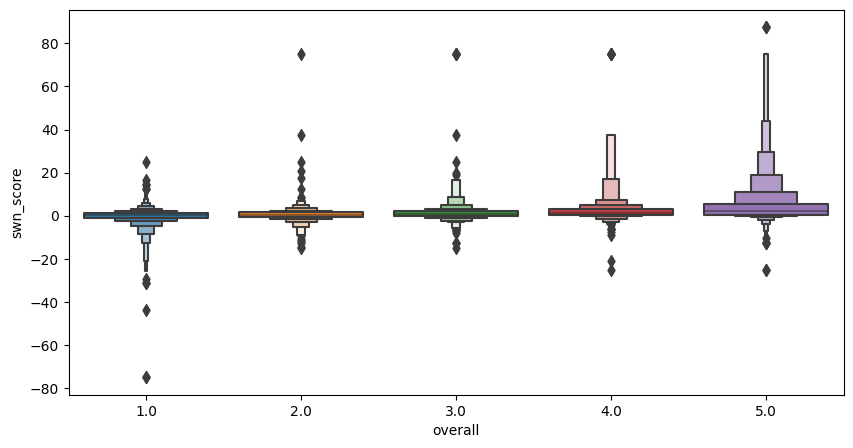

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()

In [44]:
reviews['true_sentiment'] = reviews['overall'].apply(lambda x: "positive" if x>=4 else ("neutral" if x==3 else "negative"))

In [45]:
y_swn_pred, y_true = reviews['swn_sentiment'].tolist(), reviews['true_sentiment'].tolist()

In [46]:
len(y_swn_pred), len(y_true)

(4499, 4499)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_swn_pred)

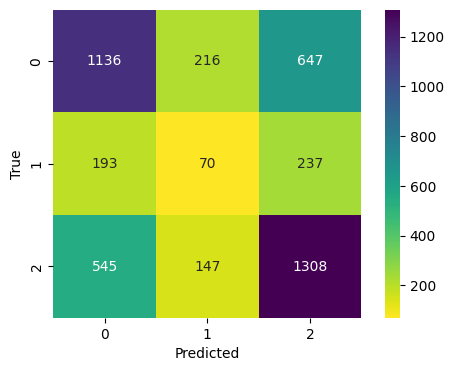

In [49]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
sns.heatmap(cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

# **Performance Metrics and Evaluation**

# 1) Negative Sentiment Prediction Assessment

In [50]:
tp, tn, fp, fn = 1136, 70+237+147+1308, 216+647, 193+545

In [51]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

In [52]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.6061899679829242
precission: 0.5682841420710355
f1 score: 0.5866253550219468


# 2) Positive Sentiment Prediction Assessment


In [56]:
tp1, tn1, fp1, fn1 = 1308, 1136+216+70+193, 237+647, 147+545

In [57]:
recall1 = tp1 / (tp1+fn1)
specifity1 = tn1 / (tn1+fp1)
precision1 = tp1/(tp1+fp1)
f1_1 = (2*tp1) / (2*tp1 + fp1 + fn1)

In [59]:
print("recall: {}\nprecission: {}\nf1 score: {}".format(recall1, precision1, f1_1))

recall: 0.654
precission: 0.5967153284671532
f1 score: 0.6240458015267175


## **Sentiment Scoring Model Using NLTK Opinion Lexicon**

In [60]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("opinion_lexicon")

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [61]:
pos_words = list(opinion_lexicon.positive())
neg_words = list(opinion_lexicon.negative())

In [62]:
def get_sentiment_score_oplex(text):

    """
        This method returns the sentiment score of a given text using nltk opinion lexicon.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """
    total_score = 0

    raw_sentences = sent_tokenize(text)

    for sentence in raw_sentences:

        sent_score = 0
        sentence = str(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        for token in tokens:
            sent_score = sent_score + 1 if token in pos_words else (sent_score - 1 if token in neg_words else sent_score)
        total_score = total_score + (sent_score / len(tokens))


    return total_score

In [63]:
reviews['oplex_sentiment_score'] = reviews['reviewText'].apply(lambda x: get_sentiment_score_oplex(x))

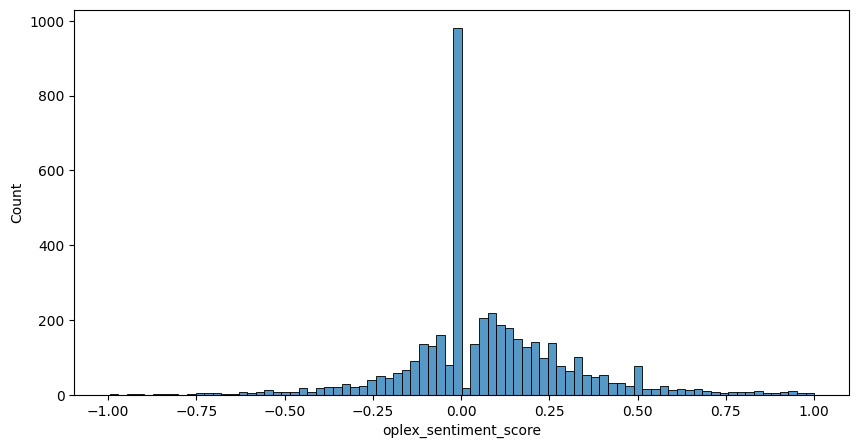

In [64]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.histplot(x='oplex_sentiment_score',\
             data=reviews.query("oplex_sentiment_score < 1 and oplex_sentiment_score>-1"), ax=ax)
plt.show()

In [65]:
reviews['oplex_sentiment'] = reviews['oplex_sentiment_score'].apply(lambda x: "positive" if x>0.1 else ("negative" if x<0 else "neutral"))

In [66]:
reviews['oplex_sentiment'].value_counts(dropna=False)

positive    1812
neutral     1578
negative    1109
Name: oplex_sentiment, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

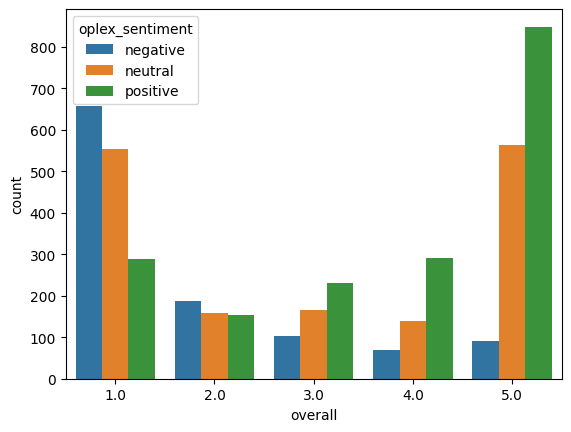

In [67]:
sns.countplot(x='overall', hue='oplex_sentiment' ,data = reviews)

<Axes: xlabel='oplex_sentiment', ylabel='overall'>

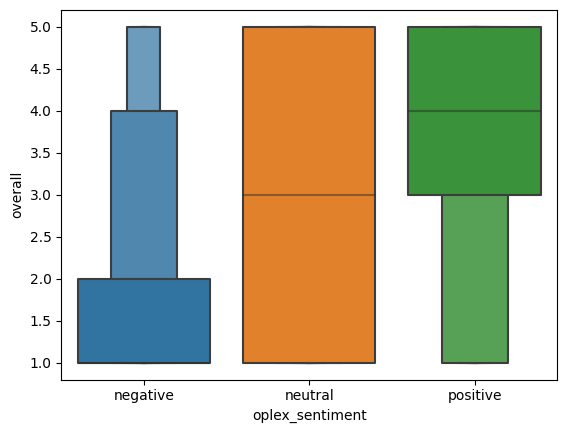

In [68]:
sns.boxenplot(x='oplex_sentiment', y='overall', data = reviews)

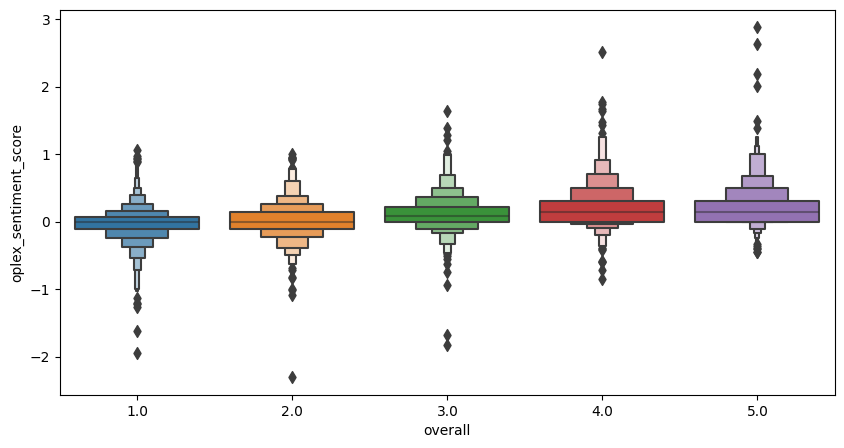

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,5))
sns.boxenplot(x='overall', y='oplex_sentiment_score', data = reviews, ax=ax)
plt.show()

In [70]:
y_oplex_pred = reviews['oplex_sentiment'].tolist()


In [71]:
oplex_cm = confusion_matrix(y_true, y_oplex_pred)


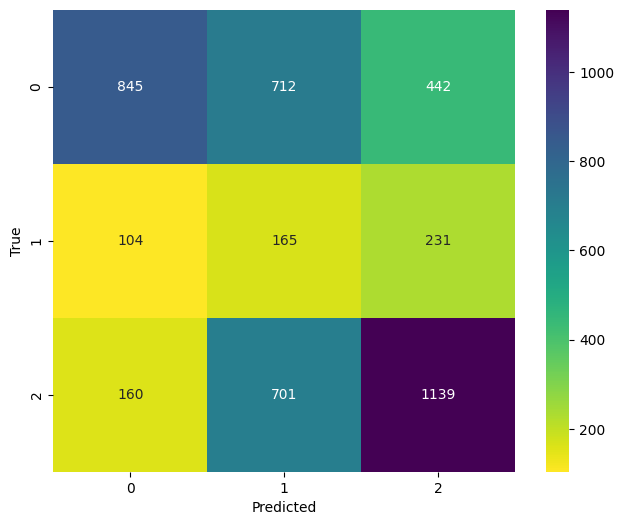

In [72]:
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
sns.heatmap(oplex_cm, cmap='viridis_r', annot=True, fmt='d', square=True, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [73]:
oplex_cm = list(oplex_cm.ravel())
oplex_cm

# Negative Label Assessment

In [74]:
tp, tn, fp, fn = 845, 165+231+701+1139, 104+160, 712+442

In [75]:
recall = tp / (tp+fn)
specifity = tn / (tn+fp)
precision = tp/(tp+fp)
f1 = (2*tp) / (2*tp + fp + fn)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall, precision, f1))

recall: 0.4227113556778389
precission: 0.7619477006311993
f1 score: 0.5437580437580437


In [76]:
tp2, tn2, fp2, fn2 = 1139, 845+712+104+165, 442+231, 160+701


In [77]:
recall2 = tp2 / (tp2+fn2)
specifity2 = tn2 / (tn2+fp2)
precision2 = tp2/(tp2+fp2)
f1_2 = (2*tp2) / (2*tp2 + fp2 + fn2)

print("recall: {}\nprecission: {}\nf1 score: {}".format(recall2, precision2, f1_2))

recall: 0.5695
precission: 0.6285871964679912
f1 score: 0.5975865687303253
